# Revisiting the Confusion Matrix, the ROC Curve and the Precision-Recall Curve

The dataset is the [wine quality data](https://www.kaggle.com/rajyellow46/wine-quality)

### [Learning objective 1] Use Pandas to do data preparation

In [1]:
import numpy as np
import pandas as pd
path = ''
df = pd.read_csv(path + '/winequalityN.csv')
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<AxesSubplot:>

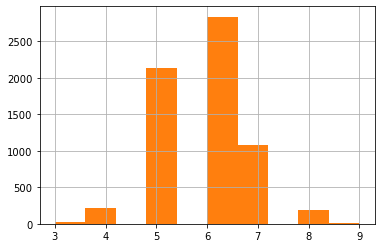

In [2]:
df['quality'].hist()
df.quality.hist()

In [3]:
df['red_wine'] = np.where(df['type']=='red',1,0)
df['target'] =np.where(df['quality']>=8,1,0)
[df['target'].value_counts(),df['target'].value_counts(normalize=True)]

[0    6299
 1     198
 Name: target, dtype: int64,
 0    0.969524
 1    0.030476
 Name: target, dtype: float64]

In [4]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'red_wine', 'target'],
      dtype='object')

In [5]:
features = [ 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'red_wine']

In [6]:
missing_values = df.isnull().sum()
missing_values

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
red_wine                 0
target                   0
dtype: int64

In [7]:
missing_values_per = (df.isnull().sum() / df.isnull().count())
missing_values_per

type                    0.000000
fixed acidity           0.001539
volatile acidity        0.001231
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.001385
sulphates               0.000616
alcohol                 0.000000
quality                 0.000000
red_wine                0.000000
target                  0.000000
dtype: float64

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values_per = (df.isnull().sum() / df.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
type,0,0.000000
fixed acidity,10,0.001539
volatile acidity,8,0.001231
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [9]:
r = pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage']).reset_index()
r

,index,Count_of_Missing,Percentage
0,type,0,0.000000
1,fixed acidity,10,0.001539
2,volatile acidity,8,0.001231
3,citric acid,3,0.000462
4,residual sugar,2,0.000308
5,chlorides,2,0.000308
6,free sulfur dioxide,0,0.000000
7,total sulfur dioxide,0,0.000000
8,density,0,0.000000
9,pH,9,0.001385


In [10]:
def null_cell(df):
    dfx = df.copy()
    missing_values = dfx.isnull().sum()
    missing_values_per = dfx.isnull().sum() / dfx.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df)).index
fill_list

Index(['fixed acidity', 'pH', 'volatile acidity', 'sulphates', 'citric acid',
       'residual sugar', 'chlorides'],
      dtype='object')

* Pandas uses .loc to locate elements in a data frame. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) for references.
* The following block first finds the columns with missing values: df_mean.loc[:,col]
* Then use fillna() to impute the missing values with the average values.
Use the for-loop function to impute missing values for those columns

In [11]:
r.loc[r['index']=='type','Percentage']

0    0.0
Name: Percentage, dtype: float64

In [12]:
df_mean = df # Do you know this is different from "df_mean = df.copy()?"" This just point to the same data frame. It does not create a copy.
df_mean = df.copy() # Here create a physical copy of df.

In [13]:
for col in fill_list:
    df_mean.loc[:,col].fillna(df_mean.loc[:,col].mean(),inplace=True)

### [Learning objective 2] How does it work? Let's build a decision tree in Python

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_mean[features],
                                                    df_mean['target'], 
                                                    random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
# Then, train the model.
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

#### A few important hyperparameters:
(1) Criterion:
* Define the function to measure the quality of a split. There are two options: "gini" for the Gini impurity and "entropy" for the information gain.
* The default is "gini"

(2) Splitter:
* The default is "best". The tree splits on the most relevant feature.
* If you select "random", the tree will take a random feature and split it. As a result your tree may end with more depth or less prevision. [This post](https://stackoverflow.com/questions/46756606/what-does-splitter-attribute-in-sklearns-decisiontreeclassifier-do) does an experiment.

(3) max_depth:
* The maximum depth of the tree. If None (the default), the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

(4) min_samples_split: 
* The minimum number of samples required to split an internal node. The default is 2.

(5) min_impurity_decrease:
* A node will be splitted if this split induces a decrease of the impurity greater than or equal to this value. The default is 0.

### (2.2) Show the Importance of the "key questions" with the "variable importance"

In [16]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
10,alcohol,0.238
3,residual sugar,0.178
1,volatile acidity,0.144
5,free sulfur dioxide,0.121
4,chlorides,0.098
9,sulphates,0.055
0,fixed acidity,0.050
2,citric acid,0.045
6,total sulfur dioxide,0.038
7,density,0.033


* Use [pandas to plot a bar chart](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

<AxesSubplot:xlabel='feature'>

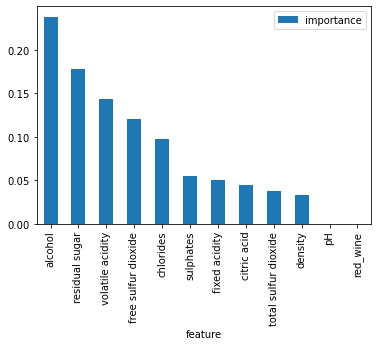

In [17]:
importances.plot.bar(x='feature')

### [Learning objective 3] Predict new observations

* **predict():** the cutpoint of predict() is 0.5. It's the only sensible threshold from a mathematical viewpoint.
* **predict_proba():** (p0,p1)

In [18]:
predictions = dtree.predict(X_test[0:10])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
dtree.predict_proba(X_test[0:10])

array([[1.00000000e+00, 0.00000000e+00],
       [9.99090909e-01, 9.09090909e-04],
       [9.87096774e-01, 1.29032258e-02],
       [1.00000000e+00, 0.00000000e+00],
       [9.99090909e-01, 9.09090909e-04],
       [9.95815900e-01, 4.18410042e-03],
       [9.99090909e-01, 9.09090909e-04],
       [9.99090909e-01, 9.09090909e-04],
       [9.99090909e-01, 9.09090909e-04],
       [1.00000000e+00, 0.00000000e+00]])

In [20]:
y_pred = dtree.predict_proba(X_test[0:10])[:,1]
y_pred

array([0.        , 0.00090909, 0.01290323, 0.        , 0.00090909,
       0.0041841 , 0.00090909, 0.00090909, 0.00090909, 0.        ])

### (4.1) Confusion Matrix

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

predictions = dtree.predict(X_test[features])
print(accuracy_score(Y_test,predictions))

0.9716923076923077


In [22]:
np.count_nonzero(Y_test == 1)

47

In [23]:
confusion_matrix(Y_test,predictions)

array([[1571,    7],
       [  39,    8]])

### (4.2) ROC

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.8290995874120216

In [25]:
def CM(Y_test,y_pred,threshold):
    # The Confusion Matrix given a threshold
    y_pred = np.where(y_pred>threshold,1,0)
    cm = pd.DataFrame(confusion_matrix(Y_test,y_pred))
    cm.rename(columns={0:'Pred_neg', 1:'Pred_pos'},
         index = {0:'Actual_neg',1:'Actual_pos'},inplace=True)
    cm['Total'] = cm['Pred_neg'] + cm['Pred_pos'] 
    rowsum = cm.sum()
    rowsum.name = 'Total'
    cm = cm.append(rowsum.transpose())
    
    # TP/TN/FP/FN/TPR/FPR
    P = cm['Total']['Actual_pos']
    N = cm['Total']['Actual_neg']
    TP = cm['Pred_pos']['Actual_pos']
    TN = cm['Pred_neg']['Actual_neg']
    FP = cm['Pred_pos']['Actual_neg']
    FN = cm['Pred_neg']['Actual_pos']
    TPR = np.round(TP/P,2)
    FPR = np.round(FP/N,2)
    return(cm, TPR, FPR)
cm, TPR, FPR = CM(Y_test,y_pred,0.5)
cm

,Pred_neg,Pred_pos,Total
Actual_neg,1571,7,1578
Actual_pos,39,8,47
Total,1610,15,1625


In [26]:
TPR, FPR 

(0.17, 0.0)

In [27]:
cm, TPR, FPR = CM(Y_test,y_pred,0.1)
cm

,Pred_neg,Pred_pos,Total
Actual_neg,1484,94,1578
Actual_pos,27,20,47
Total,1511,114,1625


In [28]:
TPR, FPR 

(0.43, 0.06)

In [48]:
cm, TPR, FPR = CM(Y_test,y_pred,0.8)
cm

,Pred_neg,Pred_pos,Total
Actual_neg,1573,5,1578
Actual_pos,41,6,47
Total,1614,11,1625


In [30]:
TPR, FPR 

(0.09, 0.0)

In [47]:
print("TPR  FPR")
for threshold in range(0,20):
   cm, TPR, FPR = CM(Y_test,y_pred,threshold/20)
   print (TPR, FPR)

TPR  FPR
0.94 0.86
0.62 0.15
0.43 0.06
0.43 0.05
0.38 0.05
0.26 0.02
0.23 0.01
0.19 0.01
0.19 0.01
0.19 0.01
0.17 0.0
0.17 0.0
0.15 0.0
0.15 0.0
0.15 0.0
0.15 0.0
0.13 0.0
0.13 0.0
0.09 0.0
0.09 0.0


In [31]:
# The canned function in scikit-learn
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
np.round([fpr,tpr, thresholds],2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.02, 0.04,
        0.05, 0.05, 0.06, 0.06, 0.08, 0.09, 0.15, 0.18, 0.25, 0.32, 0.36,
        0.41, 0.86, 1.  ],
       [0.  , 0.09, 0.13, 0.15, 0.17, 0.19, 0.19, 0.19, 0.23, 0.26, 0.36,
        0.38, 0.43, 0.43, 0.43, 0.49, 0.49, 0.62, 0.66, 0.74, 0.87, 0.91,
        0.94, 0.94, 1.  ],
       [2.  , 1.  , 0.86, 0.8 , 0.56, 0.5 , 0.43, 0.4 , 0.33, 0.3 , 0.25,
        0.23, 0.2 , 0.15, 0.11, 0.1 , 0.07, 0.05, 0.04, 0.03, 0.02, 0.01,
        0.  , 0.  , 0.  ]])

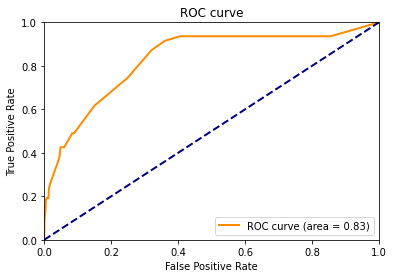

In [32]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
df_actual_predict = pd.DataFrame({'actual':Y_test, 'pred':y_pred})
df_actual_predict.head()

,actual,pred
5316,0,0.000000
5210,0,0.000909
3518,0,0.012903
1622,0,0.000000
2443,0,0.000909


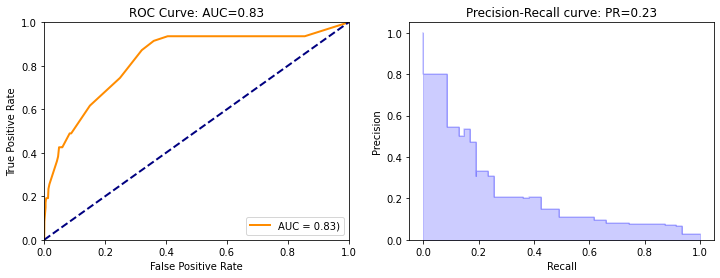

In [34]:
def ROC_PR(df_actual_predict):
    
    # ROC
    from sklearn.metrics import roc_curve,roc_auc_score, auc 
    from sklearn.metrics import average_precision_score, precision_recall_curve

    roc_auc_value = roc_auc_score(df_actual_predict['actual'],df_actual_predict['pred'])
    fpr, tpr, _ = roc_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    roc_auc = auc(fpr,tpr)
    
    import matplotlib.pyplot as plt
    lw=2
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='AUC = %0.2f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: AUC={0:0.2f}'.format(roc_auc_value))
    plt.legend(loc='lower right')
    
    # Precision-Recall
    plt.subplot(1,2,2)
    average_precision = average_precision_score(df_actual_predict['actual'],df_actual_predict['pred'])
    precision, recall, _ = precision_recall_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.title('Precision-Recall curve: PR={0:0.2f}'.format(average_precision))
    
ROC_PR(df_actual_predict)